In [2]:
#%pip install qiskit[visualization]==1.0.2
#%pip install qiskit_aer
#%pip install qiskit_ibm_runtime
#%pip install matplotlib
#%pip install pylatexenc
#%pip install qiskit-transpiler-service

In [3]:
import qiskit
qiskit.__version__

'1.0.2'

In [4]:
# imports
import numpy as np
from typing import List, Callable
from scipy.optimize import minimize
from scipy.optimize._optimize import OptimizeResult
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, SparsePauliOp
from qiskit.primitives import StatevectorSampler, PrimitiveJob
from qiskit.circuit.library import TwoLocal
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from qiskit_aer import AerSimulator

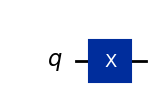

In [6]:

# Create a new circuit with a single qubit
qc = QuantumCircuit(1) #定義幾個位元的量子電路

# Add a Not gate to qubit 0
qc.x(0) 

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
qc.draw('mpl')

{'1': 1024}


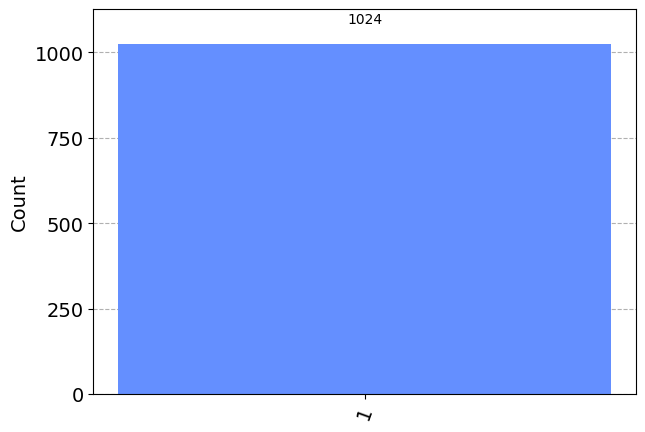

In [7]:

qc.measure_all()

sampler = StatevectorSampler()
pub = (qc)
job_sampler = sampler.run([pub], shots=1024)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)
plot_histogram(counts_sampler)

### 練習一
<div class="alert alert-block alert-info">
請練習Y、Z、H閘
<p>可以參考 <a href="https://docs.quantum.ibm.com/api/qiskit/circuit_library" target="_blank">Qiskit 電路庫</a></p>
</div>

## Bell state

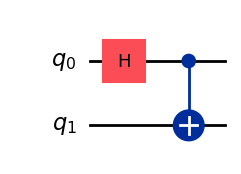

In [8]:
# Create a new circuit with two qubits
qc = QuantumCircuit(2)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a CNOT gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
qc.draw('mpl')

{'00': 526, '11': 498}


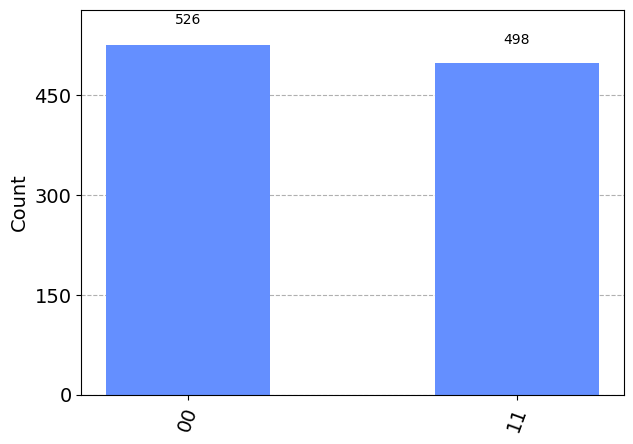

In [9]:
qc.measure_all()

sampler = StatevectorSampler()
pub = (qc)
job_sampler = sampler.run([pub], shots=1024)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)
plot_histogram(counts_sampler)

## 練習二
<div class="alert alert-block alert-info">

請建立$| \psi ^- \rangle$ Bell state
</div>

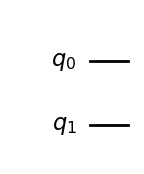

In [10]:
# Create a new circuit with two qubits
qc = QuantumCircuit(2)

## code blew here


# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
qc.draw("mpl")

{'00': 1024}


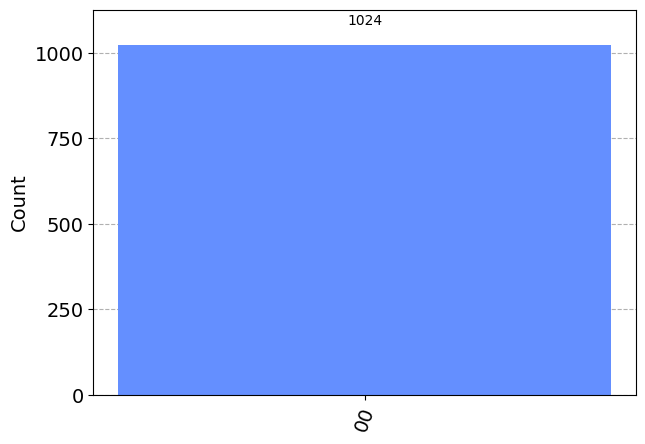

In [76]:
qc.measure_all()

sampler = StatevectorSampler()
pub = (qc)
job_sampler = sampler.run([pub], shots=1024)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)
plot_histogram(counts_sampler)

## W-state
接下來，我們將設計一個稍微複雜一點的量子電路。就像Bell態電路可以生成Bell態一樣，W態電路可以生成W態。雖然Bell態只糾纏兩個量子比特，W態則糾纏三個量子比特。要生成W態，我們只需要遵循以下六個簡單步驟：

1. 初始化我們的三量子比特電路。
2. 對其中一個量子比特執行Ry旋轉操作（具體操作細節會提供）。
3. 在第1個量子比特上執行一個受控哈達碼門（控制量子比特是第0個）。
4. 添加一個CNOT門，控制量子比特是第1個，目標量子比特是第2個。
5. 再添加一個CNOT門，這次控制量子比特是第0個，目標量子比特是第1個。
6. 最後，在第0個量子比特上添加一個X門。

現在，你只需要按照這些步驟來構建你的W態電路。

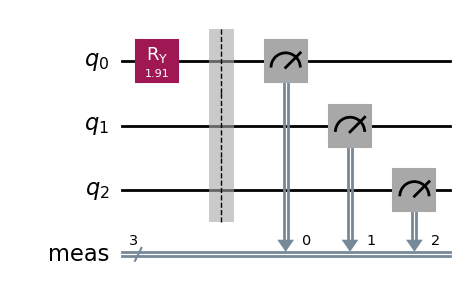

In [11]:
# Step 1
qc = QuantumCircuit(3)

# Step 2 (provided)
qc.ry(1.91063324, 0) # first is parameter, second is the qubit

# Add steps 3-6 below

### Don't change any code past this line ###
qc.measure_all()
qc.draw('mpl')

In [80]:

sampler = StatevectorSampler()
pub = (qc)
job_sampler = sampler.run([pub], shots=10000)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'001': 6634, '000': 3366}


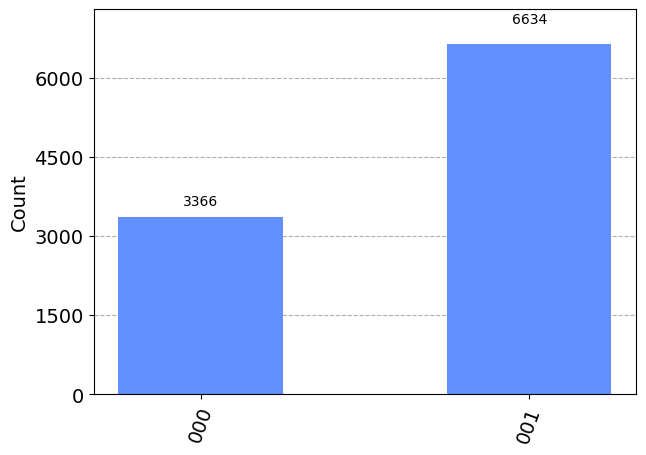

In [81]:
plot_histogram(counts_sampler)

### 最終練習-數字顯示練習
在這個練習中，我們將使用量子計算來模擬七段數字顯示器。每個量子位元將代表一個顯示段，並控制該段的亮或滅。通過量子電路，我們可以設置每個段的狀態，從而顯示不同的數字。

#### 題目介紹
<div class="alert alert-block alert-info">

我們將使用七個量子位元來代表七段顯示器的七個段

每個段的編號對應於一個量子位元的狀態。以下是段的編號和對應的量子位元：

- 0：最上面的橫段
- 1：右上角的豎段
- 2：右下角的豎段
- 3：最下面的橫段
- 4：左下角的豎段
- 5：左上角的豎段
- 6：中間的橫段

我們將使用這些量子位元來設置顯示數字1~8。

電路成本:
1. 單位元量子邏輯閘費用: 1
2. 雙量子位元邏輯閘費用: 使用前三個為0.5 之後都為1

一個cell執行一個電燈，如果cell不夠請自行新增
</div>

#### 第一階段-一個數字燈(一個狀態)
<div class="alert alert-block alert-success">

提示一: 請盡可能地使用最少的量子閘達到目標  
提示二: 僅可使用X和CX達成目標
</div>

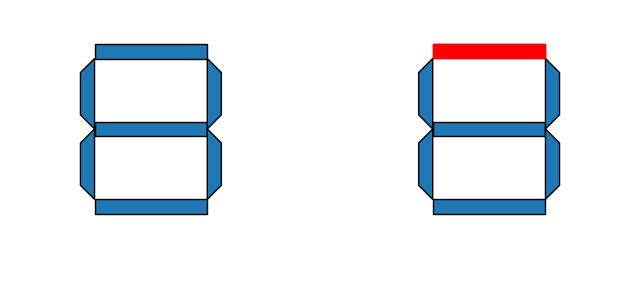

In [147]:
import matplotlib.pyplot as plt
# 定義七段顯示器的段坐標
segments = {
    '0': [(0.2, 0.4), (1.8, 0.4), (1.8, 0.2), (0.2, 0.2)],
    '1': [(0.2, 1.3), (0, 1.1), (0, 0.5), (0.2, 0.3)],
    '2': [(0.2, 0.3), (0, 0.1), (0, -0.5), (0.2, -0.7)],
    '3': [(0.2, -0.9), (1.8, -0.9), (1.8, -0.7), (0.2, -0.7)],
    '4': [(1.8, 0.3), (2, 0.1), (2, -0.5), (1.8, -0.7)],
    '5': [(1.8, 1.3), (2, 1.1), (2, 0.5), (1.8, 0.3)],
    '6': [(0.2, 1.5), (1.8, 1.5), (1.8, 1.3), (0.2, 1.3)]
}

# 創建七段顯示器的量子電路
qc = QuantumCircuit(7, 7)

###### 請更改此部分程式碼
qc.h(0)



#######
# 測量量子位元
qc.measure_all()

# 使用StatevectorSampler執行量子電路
sampler = StatevectorSampler()
job_sampler = sampler.run([qc], shots=1000) # 如果執行多次有不同答案，代表有問題

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

# 獲取測量結果
outputs = [key for key, value in counts_sampler.items() if value > 0]


#### 不要動到下面
# 繪製七段顯示器
fig, axs = plt.subplots(1, len(outputs), figsize=(4 * len(outputs), 6))
if len(outputs) == 1:
    axs = [axs]

for ax, output in zip(axs, outputs):
    for seg, coords in segments.items():
        polygon = plt.Polygon(coords, closed=True, edgecolor='black')
        ax.add_patch(polygon)
    # 根據量子位元的狀態設置每段的顯示狀態
    for i, seg in enumerate('0123456'):
        if output[i] == '1':
            ax.fill(*zip(*segments[seg]), color='red')
    ax.set_aspect('equal')
    ax.set_xlim(-1, 3)
    ax.set_ylim(-2, 2)
    ax.axis('off')

plt.show()

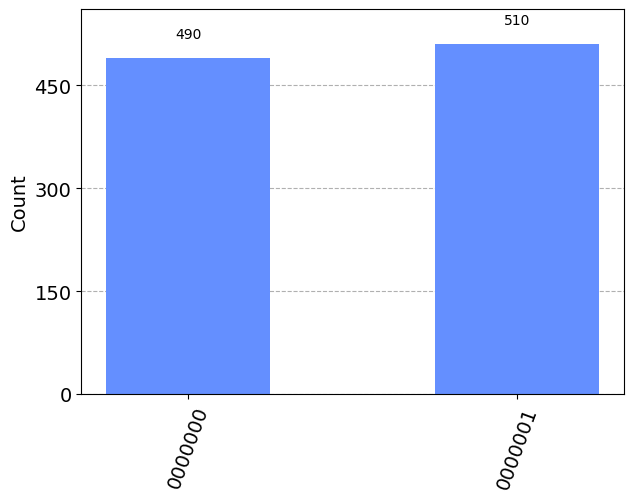

In [148]:
#確認狀態
plot_histogram(counts_sampler)

### 解釋區：

<div style="height: 200px;">
</div>  
  








#### 第二階段-疊加態
<div class="alert alert-block alert-success">

依照簡報指示，利用量子閘完成指定狀態

電路成本:
1. 單位元量子邏輯閘費用: 1
2. 雙量子位元邏輯閘費用: 使用前三個為0.5 之後都為1
</div>